In [ ]:
import pandas as pd
import timeit

In [2]:
df = pd.read_csv('data/fake_payment_data.csv')

Fazendo uma análise básica dos dados

In [3]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,791.604.835-39,2024-08-05,2024-08-12,9624,54
1,598.024.637-10,2024-05-27,2024-05-24,6620,80
2,374.590.162-25,2024-09-19,2024-10-02,8305,32
3,352.940.761-52,2024-05-28,2024-06-18,6285,47
4,386.014.275-53,2024-04-20,2024-04-23,7727,41


In [4]:
df.dtypes

cpf                object
data_vencimento    object
data_pagamento     object
valor_fatura        int64
idade               int64
dtype: object

In [5]:
df.describe()

,valor_fatura,idade
count,100.00000,100.000000
mean,5600.81000,48.830000
std,2637.73057,16.752539
min,180.00000,19.000000
25%,3451.75000,37.000000
50%,5893.50000,48.500000
75%,7901.25000,61.000000
max,9760.00000,80.000000


Objetivo: identificar pessoas que fizeram o pagamento com mais de cinco dias de atraso da fatura

In [6]:
df['data_vencimento'] = pd.to_datetime(df['data_vencimento'])
df['data_pagamento'] = pd.to_datetime(df['data_pagamento'])

df.dtypes

cpf                        object
data_vencimento    datetime64[ns]
data_pagamento     datetime64[ns]
valor_fatura                int64
idade                       int64
dtype: object

In [7]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,791.604.835-39,2024-08-05,2024-08-12,9624,54
1,598.024.637-10,2024-05-27,2024-05-24,6620,80
2,374.590.162-25,2024-09-19,2024-10-02,8305,32
3,352.940.761-52,2024-05-28,2024-06-18,6285,47
4,386.014.275-53,2024-04-20,2024-04-23,7727,41


Solução 1: utilizar looping 'for'

In [8]:
%%timeit
vencido_5_dias = []
for i, row in df.iterrows():
    if row['data_pagamento'] > row['data_vencimento'] + pd.Timedelta(days=5):
        vencido_5_dias.append(1)
    else:
        vencido_5_dias.append(0)

df['vencido_5_dias'] = vencido_5_dias

8.28 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# Salvando resultado

code_to_time = """
vencido_5_dias = []
for i, row in df.iterrows():
    if row['data_pagamento'] > row['data_vencimento'] + pd.Timedelta(days=5):
        vencido_5_dias.append(1)
    else:
        vencido_5_dias.append(0)

df['vencido_5_dias'] = vencido_5_dias
"""

execution_time = timeit.timeit(code_to_time, number=1000, globals=globals())

print(f"Execution time: {execution_time} ms")

Execution time: 7.374257599934936 ms


In [10]:
df.head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


Solução 2: utilizando df.apply

In [11]:
df.drop(['vencido_5_dias'], axis=1, inplace=True)

In [12]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,791.604.835-39,2024-08-05,2024-08-12,9624,54
1,598.024.637-10,2024-05-27,2024-05-24,6620,80
2,374.590.162-25,2024-09-19,2024-10-02,8305,32
3,352.940.761-52,2024-05-28,2024-06-18,6285,47
4,386.014.275-53,2024-04-20,2024-04-23,7727,41


In [13]:
def calcular_fatura_vencia_5_dias(row):
    if row['data_pagamento'] > row['data_vencimento'] + pd.Timedelta(days=5):
        return 1
    else:
        return 0

In [14]:
%%timeit
df['vencido_5_dias'] = df.apply(calcular_fatura_vencia_5_dias, axis=1)

1.63 ms ± 72 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# Salvando resultado

code_to_time = """
df['vencido_5_dias'] = df.apply(calcular_fatura_vencia_5_dias, axis=1)
"""

execution_time = timeit.timeit(code_to_time, number=1000, globals=globals())

print(f"Execution time: {execution_time} ms")

Execution time: 1.8263256999198347 ms


In [16]:
df.head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


Solução 3: utilizando operações vetoriais

In [17]:
df.drop(['vencido_5_dias'], axis=1, inplace=True)

In [18]:
df.head()

,cpf,data_vencimento,data_pagamento,valor_fatura,idade
0,791.604.835-39,2024-08-05,2024-08-12,9624,54
1,598.024.637-10,2024-05-27,2024-05-24,6620,80
2,374.590.162-25,2024-09-19,2024-10-02,8305,32
3,352.940.761-52,2024-05-28,2024-06-18,6285,47
4,386.014.275-53,2024-04-20,2024-04-23,7727,41


In [19]:
%%timeit
dt_vencimento = pd.to_datetime(df['data_vencimento'], format=r'%Y-%m-%d')
dt_pagamento = pd.to_datetime(df['data_pagamento'], format=r'%Y-%m-%d')

dias_vencido = (dt_pagamento - dt_vencimento).dt.days

df['vencido_5_dias'] = (dias_vencido > 5 ).astype(int)

705 μs ± 89 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
# Salvando resultado

code_to_time = """
dt_vencimento = pd.to_datetime(df['data_vencimento'], format=r'%Y-%m-%d')
dt_pagamento = pd.to_datetime(df['data_pagamento'], format=r'%Y-%m-%d')

dias_vencido = (dt_pagamento - dt_vencimento).dt.days

df['vencido_5_dias'] = (dias_vencido > 5 ).astype(int)
"""

execution_time = timeit.timeit(code_to_time, number=1000, globals=globals())

print(f"Execution time: {execution_time} ms")

Execution time: 0.6549230000237003 ms


In [21]:
df.head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


Foi testado com uma base pequena com apenas 100 linhas

Vamos verificar como o tempo aumenta conforme aumenta a base

In [22]:
def metodo_1(base):
    base['data_vencimento'] = pd.to_datetime(base['data_vencimento'])
    base['data_pagamento'] = pd.to_datetime(base['data_pagamento'])

    vencido_5_dias = []
    for i, row in df.iterrows():
        if row['data_pagamento'] > row['data_vencimento'] + pd.Timedelta(days=5):
            vencido_5_dias.append(1)
        else:
            vencido_5_dias.append(0)

    df['vencido_5_dias'] = vencido_5_dias
    return base

def metodo_2(base):
    base['data_vencimento'] = pd.to_datetime(base['data_vencimento'])
    base['data_pagamento'] = pd.to_datetime(base['data_pagamento'])
    
    base['vencido_5_dias'] = base.apply(calcular_fatura_vencia_5_dias, axis=1)
    return base

def metodo_3(base):
    dt_vencimento = pd.to_datetime(base['data_vencimento'], format=r'%Y-%m-%d')
    dt_pagamento = pd.to_datetime(base['data_pagamento'], format=r'%Y-%m-%d')

    dias_vencido = (dt_pagamento - dt_vencimento).dt.days

    base['vencido_5_dias'] = (dias_vencido > 5 ).astype(int)
    return base

In [23]:
df = pd.read_csv('data/fake_payment_data.csv')

metodo_1(df).head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


In [24]:
df = pd.read_csv('data/fake_payment_data.csv')

metodo_2(df).head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


In [25]:
df = pd.read_csv('data/fake_payment_data.csv')

metodo_3(df).head(10)

,cpf,data_vencimento,data_pagamento,valor_fatura,idade,vencido_5_dias
0,791.604.835-39,2024-08-05,2024-08-12,9624,54,1
1,598.024.637-10,2024-05-27,2024-05-24,6620,80,0
2,374.590.162-25,2024-09-19,2024-10-02,8305,32,1
3,352.940.761-52,2024-05-28,2024-06-18,6285,47,1
4,386.014.275-53,2024-04-20,2024-04-23,7727,41,0
5,938.120.465-98,2024-05-10,2024-05-27,5077,80,1
6,684.309.572-00,2024-10-18,2024-10-20,6954,45,0
7,950.768.314-39,2024-06-07,2024-06-26,3878,53,1
8,056.914.738-75,2024-03-16,2024-03-16,5641,32,0
9,781.092.354-41,2024-05-05,2024-05-06,2474,45,0


In [26]:
lista_de_tempo_de_execucao = []
lista_qtd_linhas = [1, 10, 100, 1000]
lista_de_metodos = ["metodo_1", "metodo_2", "metodo_3"]

In [27]:
# tempo de execução no meu notebook: 125 minutos
for metodo in lista_de_metodos:
    for qtd_linhas in lista_qtd_linhas:
        df = pd.read_csv('data/fake_payment_data.csv')
        df = pd.concat([df] * int(qtd_linhas), ignore_index=True)
        
        code_to_time = f'{metodo}(df)'

        print(f"Executando metodo {metodo} com {len(df)} linhas")

        execution_time = timeit.timeit(code_to_time, number=1000, globals=globals())

        lista_de_tempo_de_execucao.append({
            'metodo': metodo,
            'qtd_linhas': len(df),
            'execution_time(ms)': execution_time
        })

df = pd.DataFrame(lista_de_tempo_de_execucao)
df

Executando metodo metodo_1 com 100 linhas
Executando metodo metodo_1 com 1000 linhas
Executando metodo metodo_1 com 10000 linhas
Executando metodo metodo_1 com 100000 linhas
Executando metodo metodo_2 com 100 linhas
Executando metodo metodo_2 com 1000 linhas
Executando metodo metodo_2 com 10000 linhas
Executando metodo metodo_2 com 100000 linhas
Executando metodo metodo_3 com 100 linhas
Executando metodo metodo_3 com 1000 linhas
Executando metodo metodo_3 com 10000 linhas
Executando metodo metodo_3 com 100000 linhas


,metodo,qtd_linhas,execution_time(ms)
0,metodo_1,100,6.038290
1,metodo_1,1000,53.365732
2,metodo_1,10000,707.806653
3,metodo_1,100000,6222.413392
4,metodo_2,100,2.126148
5,metodo_2,1000,15.359989
6,metodo_2,10000,167.608635
7,metodo_2,100000,1534.682405
8,metodo_3,100,1.473977
9,metodo_3,1000,3.874016


In [36]:
resultados = df.pivot(index='qtd_linhas', columns='metodo', values='execution_time(ms)')

In [37]:
resultados.index = resultados.index * 100
resultados

metodo,metodo_1,metodo_2,metodo_3
qtd_linhas,,,
10000,6.038290,2.126148,1.473977
100000,53.365732,15.359989,3.874016
1000000,707.806653,167.608635,5.685741
10000000,6222.413392,1534.682405,21.440048


<Axes: title={'center': 'Tempo de execução por quantidade de linhas (ms)'}, xlabel='Quantidade de linhas por arquivo', ylabel='Tempo de execução (ms)'>

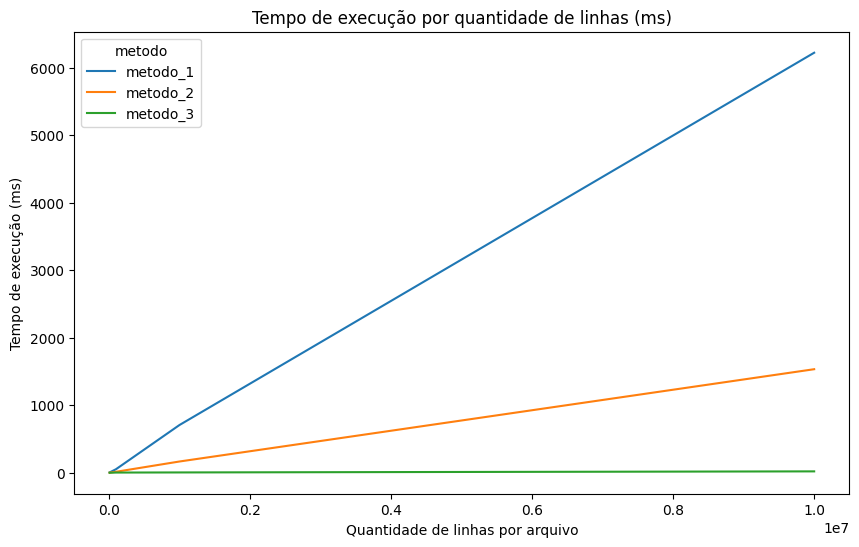

In [32]:
resultados.plot(kind='line', 
                figsize=(10, 6), 
                title='Tempo de execução por quantidade de linhas (ms)',
                xlabel='Quantidade de linhas por arquivo',
                ylabel='Tempo de execução (ms)')

<Axes: title={'center': 'Tempo de execução por quantidade de linhas (ms)'}, xlabel='Quantidade de linhas por arquivo', ylabel='Tempo de execução (ms) - escala logaritmica'>

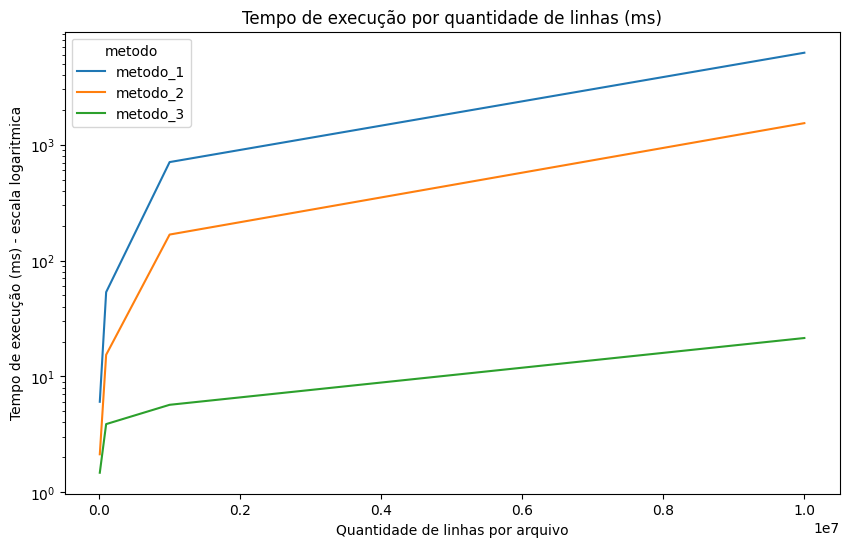

In [33]:
resultados.plot(kind='line', 
                figsize=(10, 6), 
                title='Tempo de execução por quantidade de linhas (ms)', 
                xlabel='Quantidade de linhas por arquivo',
                ylabel='Tempo de execução (ms) - escala logaritmica',
                logy=True)

In [47]:
efetividade = pd.DataFrame()

efetividade['metodos_2_metodo_1 (%)'] = ((resultados['metodo_1'] - resultados['metodo_2']) / resultados['metodo_1'] * 100).round(2)
efetividade['metodos_3_metodo_1 (%)'] = ((resultados['metodo_1'] - resultados['metodo_3']) / resultados['metodo_1'] * 100).round(2)

efetividade

,metodos_2_metodo_1 (%),metodos_3_metodo_1 (%)
qtd_linhas,,
10000,64.79,75.59
100000,71.22,92.74
1000000,76.32,99.20
10000000,75.34,99.66


Conclusão: podemos notar que o método 3 é o mais eficiente corforme aumentamos a quantidade de linhas no arquivo, uso de vetorização é mais eficiente que loops ou apply